### EDA for Political Email Database

In [18]:
#Read in the data
import pandas as pd

df1=pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/political-emails-analysis/main/main/data/emails1_df.csv")
df2=pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/political-emails-analysis/main/main/data/emails2_df.csv")
df3=pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/political-emails-analysis/main/main/data/emails3_df.csv")
df4=pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/political-emails-analysis/main/main/data/emails4_df.csv")

print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(20000, 9)
(20000, 9)
(20000, 9)
(23316, 9)


In [19]:
#Stack 4 dataframes together
df = pd.concat([df1, df2, df3, df4], ignore_index=True, axis=0)
#Delete first row and column
df = df[1:]
df = df.iloc[: , 1:]
#Preview dataframe
df.head(2)

,sender,subject,date,body,party,country,locality,office
1,JusticeDemocrats.com <[email protected]>,Critical preparations,"July 3, 2019 11:28 PM",[1]Justice Democrats\n\r\n John -- \n\r\n ...,Political Party:\nDemocratic,Country:\n\nUnited States,State/Locality:\n\t\t\t\t\t\t\t\t\t\t\t\t\tn/a,Office:\n\t\t\t\t\t\t\t\t\t\t\t\t\tn/a
2,Ana Maria Archila <[email protected]>,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019 11:31 PM","Dear friend,\n\r\n \n\r\nWe have all seen the ...",Political Party:\n\t\t\t\t\t\t\t\t\t\t\t\t\tn/a,Country:\n\nUnited States,State/Locality:\n\t\t\t\t\t\t\t\t\t\t\t\t\tn/a,Office:\n\t\t\t\t\t\t\t\t\t\t\t\t\tn/a


### Clean up various columns

In [20]:
#Clean up columns - change data type
df['sender'] = df['sender'].astype('string')
df['subject'] = df['subject'].astype('string')
df['date'] = df['date'].astype('string')
df['body'] = df['body'].astype('string')
df['party'] = df['party'].astype('string')
df['country'] = df['country'].astype('string')
df['locality'] = df['locality'].astype('string')
df.dtypes

sender      string
subject     string
date        string
body        string
party       string
country     string
locality    string
office      object
dtype: object

In [21]:
#Clean up text columns

import re 

df['party'] = df['party'].replace('Political Party:','',regex=True)
df['country'] = df['country'].replace('Country:','',regex=True)
df['locality'] = df['locality'].replace('State/Locality:','',regex=True)
df['office'] = df['office'].replace('Office:','',regex=True)
df = df.replace('\n','',regex=True)
df = df.replace('\t','',regex=True)
df['sender'] = df['sender'].replace('<','',regex=True)
df['sender'] = df['sender'].replace('>','',regex=True)

def remove_brackets_contents(text):
    pattern = r"\[.*?\]"
    return re.sub(pattern, " ", text)


def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, ' ', text)

df.loc[:,'sender'] = df['sender'].apply(func = remove_brackets_contents)


df.head(2)

,sender,subject,date,body,party,country,locality,office
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019 11:28 PM",[1]Justice Democrats John -- Last month...,Democratic,United States,n/a,n/a
2,Ana Maria Archila,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019 11:31 PM","Dear friend, We have all seen the images and...",n/a,United States,n/a,n/a


In [22]:
#Cleaning up the email body column
import warnings
warnings.filterwarnings('ignore')

df['body'] = df['body'].replace('\n','',regex=True)
df['body'] = df['body'].replace('\r','',regex=True)
df.loc[:,'body'] = df['body'].apply(func = remove_brackets_contents)
df.loc[:,'body'] = df['body'].apply(func = remove_special_characters)


df['body'] = df['body'].replace('   ',' ',regex=True)
df['body'] = df['body'].replace('    ',' ',regex=True)
df['body'] = df['body'].replace('     ',' ',regex=True)

df['body'] = df['body'].replace(']',' ',regex=True)
df['body'] = df['body'].replace('\xa0',' ',regex=True)
df['body'] = df['body'].replace('almostdaily','almost daily',regex=True)


#Remove all the text that follows these sentences
df['body'] = df['body'].str.replace("(If you need to remove yourself from our email).*","")
df['body'] = df['body'].str.replace("(Email is the most important way).*","")
df['body'] = df['body'].str.replace("(This email was sent to).*","")
df['body'] = df['body'].str.replace("(Thank you for speaking).*","")
df['body'] = df['body'].str.replace("(All Rights Reserved).*","")
df['body'] = df['body'].str.replace("(mailto:).*","")
df['body'] = df['body'].str.replace("(Thank you for choosing to fight).*","")
df['body'] = df['body'].str.replace("(Paid for by).*","")
df['body'] = df['body'].str.replace("(We look forward to hearing from you).*","")
df['body'] = df['body'].str.replace("(PAID FOR BY).*","")
df['body'] = df['body'].str.replace("(Thanks for your).*","")
df['body'] = df['body'].str.replace("(All rights reserved).*","")
df['body'] = df['body'].str.replace("(unsubscribe).*","")
df['body'] = df['body'].str.replace("(Sincerely).*","")
df['body'] = df['body'].str.replace("(Facebook).*","")
df['body'] = df['body'].str.replace("(Twitter).*","")
df['body'] = df['body'].str.replace("(Please, sign your name).*","")
df['body'] = df['body'].str.replace("(CONTRIBUTE).*","")
df['body'] = df['body'].str.replace("(Contribute).*","")

### Create features

In [23]:
df[['split1','split2','split3','split4','split5']] = df['date'].str.split(' ',expand=True)
df['date'] = df['split1'] + ' ' + df['split2'] + ' ' + df['split3']
df['time'] = df['split4'] + ' ' + df['split5']

del df['split1'], df['split2'], df['split3'], df['split4'], df['split5']
print(df['date'][1])
print(df['time'][1])

July 3, 2019
11:28 PM


In [24]:
df.head(2)

,sender,subject,date,body,party,country,locality,office,time
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019","Justice Democrats John Last month, we neede...",Democratic,United States,n/a,n/a,11:28 PM
2,Ana Maria Archila,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019","Dear friend, We have all seen the images and r...",n/a,United States,n/a,n/a,11:31 PM


In [25]:
import numpy as np

df['AM_PM'] = df['time'].str[-2:]
df['Hour'] = df['time'].str[:2]
df['Hour'] = np.where(df['Hour'].str[1:]==":",df['Hour'].str[:1],df['Hour'])
df['Hour'] = df['Hour'].astype(int)

df['Hour_Mil'] = np.where(
    df['AM_PM'] == 'PM', df['Hour'] + 12, np.where(
    (df['AM_PM'] == 'AM') & (df['Hour'] == 12), df['Hour'] - 12, df['Hour'])) 


df.head(2)

,sender,subject,date,body,party,country,locality,office,time,AM_PM,Hour,Hour_Mil
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019","Justice Democrats John Last month, we neede...",Democratic,United States,n/a,n/a,11:28 PM,PM,11,23
2,Ana Maria Archila,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019","Dear friend, We have all seen the images and r...",n/a,United States,n/a,n/a,11:31 PM,PM,11,23


In [26]:
#Grab the day, month, year
df[['month','day','year']] = df['date'].str.split(' ',expand=True)
df['day'] = df['day'].str[:1]


df['month_num'] = np.where(
    df['month'] == 'January', 1, np.where(
    df['month'] == 'February', 2, np.where(
    df['month'] == 'March', 3, np.where(
    df['month'] == 'April', 4, np.where(
    df['month'] == 'May', 5, np.where(
    df['month'] == 'June', 6, np.where(
    df['month'] == 'July', 7, np.where(
    df['month'] == 'August', 8, np.where(
    df['month'] == 'September', 9, np.where(
    df['month'] == 'October', 10, np.where(
    df['month'] == 'November', 11, 12
)))))))))))



df.head(2)

,sender,subject,date,body,party,country,locality,office,time,AM_PM,Hour,Hour_Mil,month,day,year,month_num
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019","Justice Democrats John Last month, we neede...",Democratic,United States,n/a,n/a,11:28 PM,PM,11,23,July,3,2019,7
2,Ana Maria Archila,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019","Dear friend, We have all seen the images and r...",n/a,United States,n/a,n/a,11:31 PM,PM,11,23,July,3,2019,7


In [27]:
df_dom = df[df['country']=="United States"]
df_for = df[df['country']!="United States"]

print(df_dom.shape)
print(df_for.shape)

(74148, 16)
(9167, 16)


### Exploratory Data Analysis

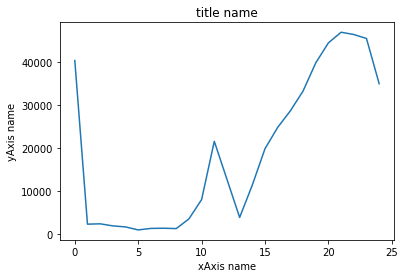

In [28]:
#When are emails sent?
# import plotly.express as px
new_df = df_dom.groupby(['Hour_Mil']).sum().reset_index()
new_df.rename(columns={ new_df.columns[1]: "Count" }, inplace = True)

# fig = px.line(new_df, x="Hour_Mil", y="Count", title='US Emails Sent by Hour')
# fig.show()

import matplotlib.pyplot as plt

plt.plot(new_df['Hour_Mil'],new_df['Count'])
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

In [29]:
month1_emails = df_dom[df_dom['month_num']==1]
month2_emails = df_dom[df_dom['month_num']==2]
month3_emails = df_dom[df_dom['month_num']==3]
month4_emails = df_dom[df_dom['month_num']==4]
month5_emails = df_dom[df_dom['month_num']==5]
month6_emails = df_dom[df_dom['month_num']==6]
month7_emails = df_dom[df_dom['month_num']==7]
month8_emails = df_dom[df_dom['month_num']==8]
month9_emails = df_dom[df_dom['month_num']==9]
month10_emails = df_dom[df_dom['month_num']==10]
month11_emails = df_dom[df_dom['month_num']==11]
month12_emails = df_dom[df_dom['month_num']==12]

m1 = month1_emails.groupby(['Hour_Mil']).sum().reset_index()
m2 = month2_emails.groupby(['Hour_Mil']).sum().reset_index()
m3 = month3_emails.groupby(['Hour_Mil']).sum().reset_index()
m4 = month4_emails.groupby(['Hour_Mil']).sum().reset_index()
m5 = month5_emails.groupby(['Hour_Mil']).sum().reset_index()
m6 = month6_emails.groupby(['Hour_Mil']).sum().reset_index()
m7 = month7_emails.groupby(['Hour_Mil']).sum().reset_index()
m8 = month8_emails.groupby(['Hour_Mil']).sum().reset_index()
m9 = month9_emails.groupby(['Hour_Mil']).sum().reset_index()
m10 = month10_emails.groupby(['Hour_Mil']).sum().reset_index()
m11 = month11_emails.groupby(['Hour_Mil']).sum().reset_index()
m12 = month12_emails.groupby(['Hour_Mil']).sum().reset_index()

m1.rename(columns={ m1.columns[1]: "Count" }, inplace = True)
m2.rename(columns={ m2.columns[1]: "Count" }, inplace = True)
m3.rename(columns={ m3.columns[1]: "Count" }, inplace = True)
m4.rename(columns={ m4.columns[1]: "Count" }, inplace = True)
m5.rename(columns={ m5.columns[1]: "Count" }, inplace = True)
m6.rename(columns={ m6.columns[1]: "Count" }, inplace = True)
m7.rename(columns={ m7.columns[1]: "Count" }, inplace = True)
m8.rename(columns={ m8.columns[1]: "Count" }, inplace = True)
m9.rename(columns={ m9.columns[1]: "Count" }, inplace = True)
m10.rename(columns={ m10.columns[1]: "Count" }, inplace = True)
m11.rename(columns={ m11.columns[1]: "Count" }, inplace = True)
m12.rename(columns={ m12.columns[1]: "Count" }, inplace = True)


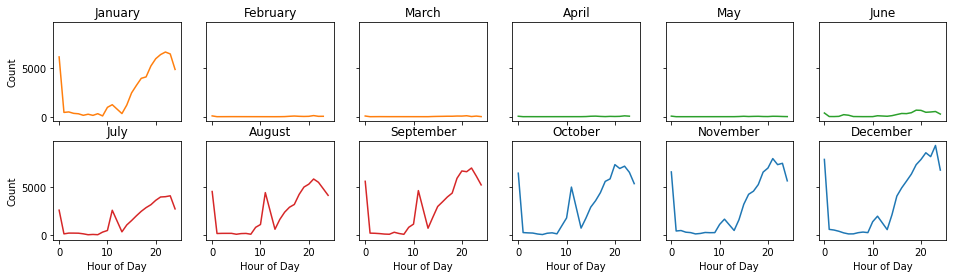

In [30]:
fig, axs = plt.subplots(2, 6,sharex=True, sharey=True, figsize=(16,4))

axs[0, 0].plot(m1['Hour_Mil'], m1['Count'], 'tab:orange')
axs[0, 0].set_title('January')

axs[0, 1].plot(m2['Hour_Mil'], m2['Count'], 'tab:orange')
axs[0, 1].set_title('February')

axs[0, 2].plot(m3['Hour_Mil'], m3['Count'], 'tab:orange')
axs[0, 2].set_title('March')

axs[0, 3].plot(m4['Hour_Mil'], m4['Count'], 'tab:green')
axs[0, 3].set_title('April')

axs[0, 4].plot(m5['Hour_Mil'], m5['Count'], 'tab:green')
axs[0, 4].set_title('May')

axs[0, 5].plot(m6['Hour_Mil'], m6['Count'], 'tab:green')
axs[0, 5].set_title('June')


axs[1, 0].plot(m7['Hour_Mil'], m7['Count'], 'tab:red')
axs[1, 0].set_title('July')

axs[1, 1].plot(m8['Hour_Mil'], m8['Count'], 'tab:red')
axs[1, 1].set_title('August')

axs[1, 2].plot(m9['Hour_Mil'], m9['Count'], 'tab:red')
axs[1, 2].set_title('September')

axs[1, 3].plot(m10['Hour_Mil'], m10['Count'], 'tab:blue')
axs[1, 3].set_title('October')

axs[1, 4].plot(m11['Hour_Mil'], m11['Count'], 'tab:blue')
axs[1, 4].set_title('November')

axs[1, 5].plot(m12['Hour_Mil'], m12['Count'], 'tab:blue')
axs[1, 5].set_title('December')

for ax in axs.flat:
    ax.set(xlabel='Hour of Day', ylabel='Count')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()



In [31]:
df_dom['State'] = np.where(df_dom['locality'].isin([
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 
    'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 
    'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 
    'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
    'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 
    'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 
    'Wisconsin', 'Wyoming'
]),1,0)
df_dom['State'].value_counts()

0    46324
1    27824
Name: State, dtype: int64

In [32]:
import pandas as pd
test = df_dom[df_dom['State']==1]
test = test[['locality']]

# Get State Crosswalk From Generic Website
crosswalk = 'http://app02.clerk.org/menu/ccis/Help/CCIS%20Codes/state_codes.html'
states = pd.read_html(crosswalk)[0]

# Demo Crosswalking State Name to State Abbreviation
test['ST'] = test['locality'].map(dict(zip(states['Description'], 
                                         states['Code'])))

test.head()

,locality,ST
3,Ohio,OH
4,Texas,TX
5,Kentucky,KY
8,Washington,WA
9,California,CA


### Prepare data for sentiment classification

In [55]:
from nltk.tokenize import RegexpTokenizer
import contractions

def punct(text):
    token=RegexpTokenizer(r'\w+')#regex
    text = token.tokenize(text)
    text= " ".join(text)
    return text 

def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

def remove_digits(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

def lemmatize(text):
    lemmed = contractions.fix(str(text))
    return lemmed



def remove_weird_words_that_showed_up_in_analysis_(str):
    #select english stopwords
    cachedStopWords = set(stopwords.words("english"))
    #add custom words
    cachedStopWords.update(('height','width','style','saved','payment','information','https',
                            'fmailchi','mp','chip','tr','td','style','font','size','px','view'
                            'email','browser','zwnj','metered','paywall','articles','vertical',
                            'align','top','item','img','src','rss','mc','actblue','com','donate',
                            'donation'
                           ))
    #remove stop words
    new_str = ' '.join([word for word in str.split() if word not in cachedStopWords]) 
    return new_str



In [49]:
#Apply standardizing functions to body of email column
from nltk.corpus import stopwords
stop = stopwords.words('english')

#0.) Convert everything to string
df['cleaned_body'] = df['body'].astype(str)
#1.) Lowercase
df.loc[:,'cleaned_body'] = df['cleaned_body'].str.lower()
#2.) Remove punctuation
df.loc[:,'cleaned_body'] = df['cleaned_body'].apply(func = punct)
#3.) Remove non alpha-numeric characters
df.loc[:,'cleaned_body'] = df['cleaned_body'].apply(func = remove_special_characters)
#4.) Remove digits
df.loc[:,'cleaned_body'] = df['cleaned_body'].apply(func = remove_digits)
#5.) Lemmatize words
df.loc[:,'cleaned_body'] = df['cleaned_body'].apply(func = lemmatize)
#6. Remove stop words
df.loc[:,'cleaned_body'] = df['cleaned_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#7. Remove weird words that showed up in the analysis
df.loc[:,'cleaned_body'] = df['cleaned_body'].apply(func = remove_weird_words_that_showed_up_in_analysis_)

#Present results
df['cleaned_body'].head(5)

1    justice democrats john last month needed ask h...
2    dear friend seen images read stories migrants ...
3    team access education fundamental child succes...
4    beto america john trump administration created...
5    john tomorrow fourth july day us come together...
Name: cleaned_body, dtype: object

In [35]:
#Set up VADER score to get labels for doing classification later
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['cleaned_body'].map(lambda x: sia.polarity_scores(x))
df['sentiment'].head(4)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jonzimmerman/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


1    {'neg': 0.047, 'neu': 0.487, 'pos': 0.467, 'co...
2    {'neg': 0.207, 'neu': 0.674, 'pos': 0.12, 'com...
3    {'neg': 0.143, 'neu': 0.658, 'pos': 0.199, 'co...
4    {'neg': 0.069, 'neu': 0.686, 'pos': 0.245, 'co...
Name: sentiment, dtype: object

In [36]:
df['compound']  = df['sentiment'].apply(lambda score_dict: score_dict['compound'])
df['comp_score'] = df['compound'].apply(lambda x: 1 if x >=0 else 0)
df.head(2)

,sender,subject,date,body,party,country,locality,office,time,AM_PM,Hour,Hour_Mil,month,day,year,month_num,cleaned_body,sentiment,compound,comp_score
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019","Justice Democrats John Last month, we neede...",Democratic,United States,n/a,n/a,11:28 PM,PM,11,23,July,3,2019,7,justice democrats john last month needed ask h...,"{'neg': 0.047, 'neu': 0.487, 'pos': 0.467, 'co...",0.9912,1
2,Ana Maria Archila,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019","Dear friend, We have all seen the images and r...",n/a,United States,n/a,n/a,11:31 PM,PM,11,23,July,3,2019,7,dear friend seen images read stories migrants ...,"{'neg': 0.207, 'neu': 0.674, 'pos': 0.12, 'com...",-0.9807,0


In [40]:
#df.to_csv('/Users/jonzimmerman/Desktop/Data Projects/Political Emails/main/data/emails_df_full.csv', index=False, header=True)


In [38]:
df.shape

(83315, 20)

In [39]:
df.columns

Index(['sender', 'subject', 'date', 'body', 'party', 'country', 'locality',
       'office', 'time', 'AM_PM', 'Hour', 'Hour_Mil', 'month', 'day', 'year',
       'month_num', 'cleaned_body', 'sentiment', 'compound', 'comp_score'],
      dtype='object')

### N-Grams

In [41]:
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# Define function to visualise n-grams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jonzimmerman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
#Take a look at n-grams for entire dataset
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

top_bigrams1 = pd.DataFrame(get_top_ngram(df['cleaned_body'],1)[:10],columns=['word','count'])
top_bigrams2 = pd.DataFrame(get_top_ngram(df['cleaned_body'],2)[:10],columns=['word','count'])
top_bigrams3 = pd.DataFrame(get_top_ngram(df['cleaned_body'],3)[:10],columns=['word','count'])

#Make subplots to display different slices of data all together on one plot
fig = make_subplots(rows=1, cols=3, start_cell="bottom-left")

fig.add_trace(go.Bar(x=top_bigrams1['word'], y=top_bigrams1['count'], name='1-Gram'),row=1, col=1)
fig.add_trace(go.Bar(x=top_bigrams2['word'], y=top_bigrams2['count'], name='2-Gram'),row=1, col=2)
fig.add_trace(go.Bar(x=top_bigrams3['word'], y=top_bigrams3['count'], name='3-Gram'),row=1, col=3)

fig.show()

In [57]:
df_dom = df[df['country']=="United States"]

top_bigrams1 = pd.DataFrame(get_top_ngram(df_dom['cleaned_body'],1)[:10],columns=['word','count'])
top_bigrams2 = pd.DataFrame(get_top_ngram(df_dom['cleaned_body'],2)[:10],columns=['word','count'])
top_bigrams3 = pd.DataFrame(get_top_ngram(df_dom['cleaned_body'],3)[:10],columns=['word','count'])

#Make subplots to display different slices of data all together on one plot
fig = make_subplots(rows=1, cols=3, start_cell="bottom-left")

fig.add_trace(go.Bar(x=top_bigrams1['word'], y=top_bigrams1['count'], name='1-Gram'),row=1, col=1)
fig.add_trace(go.Bar(x=top_bigrams2['word'], y=top_bigrams2['count'], name='2-Gram'),row=1, col=2)
fig.add_trace(go.Bar(x=top_bigrams3['word'], y=top_bigrams3['count'], name='3-Gram'),row=1, col=3)

fig.show()

In [58]:
df_dom['party'].value_counts()

n/a                                        39111
Democratic                                 27790
Republican                                  6561
Democratic Socialists of America (DSA)       362
Communist Party USA                          133
Green Party of the United States              76
Progressive Party (US)                        73
Minnesota Democratic-Farmer-Labor Party       27
Constitution Party                             9
Libertarian Party (US)                         4
Democratic-Farmer-Labor                        2
Name: party, dtype: Int64

In [59]:
df_dom_dem = df_dom[df_dom['party']=="Democratic"]

top_bigrams1 = pd.DataFrame(get_top_ngram(df_dom_dem['cleaned_body'],1)[:10],columns=['word','count'])
top_bigrams2 = pd.DataFrame(get_top_ngram(df_dom_dem['cleaned_body'],2)[:10],columns=['word','count'])
top_bigrams3 = pd.DataFrame(get_top_ngram(df_dom_dem['cleaned_body'],3)[:10],columns=['word','count'])

#Make subplots to display different slices of data all together on one plot
fig = make_subplots(rows=1, cols=3, start_cell="bottom-left")

fig.add_trace(go.Bar(x=top_bigrams1['word'], y=top_bigrams1['count'], name='1-Gram'),row=1, col=1)
fig.add_trace(go.Bar(x=top_bigrams2['word'], y=top_bigrams2['count'], name='2-Gram'),row=1, col=2)
fig.add_trace(go.Bar(x=top_bigrams3['word'], y=top_bigrams3['count'], name='3-Gram'),row=1, col=3)

fig.show()

In [63]:
df_dom_gop = df_dom[df_dom['party']=="Republican"]

top_bigrams1 = pd.DataFrame(get_top_ngram(df_dom_dem['cleaned_body'],1)[:10],columns=['word','count'])
top_bigrams2 = pd.DataFrame(get_top_ngram(df_dom_dem['cleaned_body'],2)[:10],columns=['word','count'])
top_bigrams3 = pd.DataFrame(get_top_ngram(df_dom_dem['cleaned_body'],3)[:10],columns=['word','count'])

#Make subplots to display different slices of data all together on one plot
fig = make_subplots(rows=1, cols=3, start_cell="bottom-left")

fig.add_trace(go.Bar(x=top_bigrams1['word'], y=top_bigrams1['count'], name='1-Gram'),row=1, col=1)
fig.add_trace(go.Bar(x=top_bigrams2['word'], y=top_bigrams2['count'], name='2-Gram'),row=1, col=2)
fig.add_trace(go.Bar(x=top_bigrams3['word'], y=top_bigrams3['count'], name='3-Gram'),row=1, col=3)

fig.show()

### Topic Modeling

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
from sklearn.decomposition import NMF


#Define function to create a word cloud visualization of topic modelling results
def topic_model_pipeline(data,filter_num,topic_num,title):
    subset = data[data['comp_score']==filter_num]

    #Identify topics with Non-Negative Matrix Factorization method
    vectorizer = TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')
    dtm = vectorizer.fit_transform(subset['cleaned_body'].values.astype('U'))

    nmf_mod = NMF(n_components=5,random_state=42)
    nmf_mod.fit(dtm)

    df_topics = nmf_mod.transform(dtm)
    df_topic_label = {
            0:"Topic 1",
            1:"Topic 2",       
            2:"Topic 3",
            3:"Topic 4",
            4:"Topic 5"

        }

    #Label text in dataframe as belonging to one of the topics
    subset['topic_num'] = df_topics.argmax(axis=1)
    subset['topic_label'] = subset['topic_num'].map(df_topic_label)

    topic_count = subset.groupby(['topic_label']).size().reset_index(name='counts')
    topic_count = topic_count.sort_values(by='counts',ascending=False).reset_index()
    top_topic = topic_count['topic_label'][topic_num]

    wc_df = subset[subset['topic_label']==top_topic]

    #Let's look at top topic represented in the word cloud
    wc_df_topic = wc_df['cleaned_body']

    wordcloud = WordCloud(
                background_color='black',
                min_word_length = 4
    ).generate(' '.join(wc_df_topic))
    fig_wordcloud = px.imshow(
                wordcloud,
                template='plotly_dark',
                #title='Most Common Words within Highest Ranked Topic for Non-Articles'
                title = f'{title}'
    )

    fig_wordcloud.update_layout(margin=dict(l=0, r=0, t=30, b=0),title_x=0.5)
    fig_wordcloud.update_xaxes(visible=False)
    fig_wordcloud.update_yaxes(visible=False)
    return fig_wordcloud


## Any latent topics in the emails by classification?

#### Arg1 = dataset
#### Arg2 = 0 or 1 (neg vs. pos sentiment)
#### Arg3 = 0 - 4 (Topics 1-5)
#### Arg4 = Title


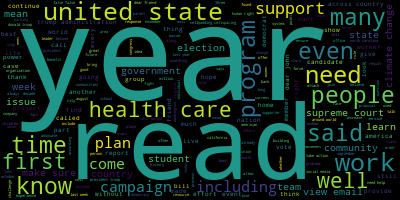

In [65]:
#Positive Sentiment - all of US
topic_model_pipeline(df_dom,1,0,'Most Common Words within Highest Ranked Topic for Positive Sentiment')


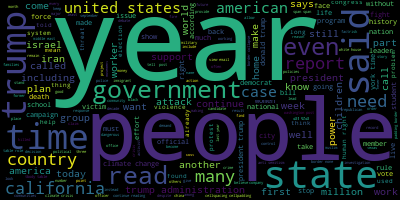

In [66]:
#Negative Sentiment - all of US
topic_model_pipeline(df_dom,0,0,'Most Common Words within Highest Ranked Topic for Positive Sentiment')


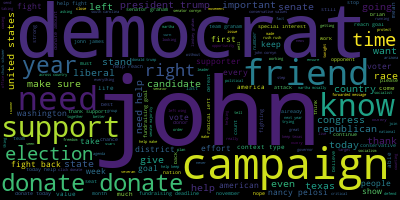

In [67]:
#Positive Sentiment - US - DEM
topic_model_pipeline(df_dom_dem,1,0,'Most Common Words within Highest Ranked Topic for Positive Sentiment')


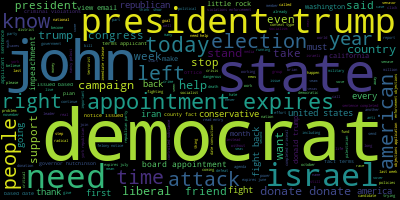

In [68]:
#Negative Sentiment - US -DEM
topic_model_pipeline(df_dom_dem,0,0,'Most Common Words within Highest Ranked Topic for Positive Sentiment')


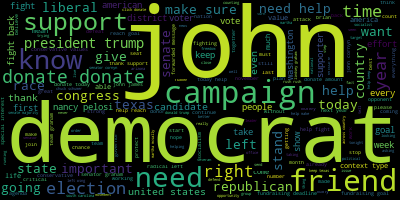

In [69]:
#Positive Sentiment - US - GOP
topic_model_pipeline(df_dom_gop,1,0,'Most Common Words within Highest Ranked Topic for Positive Sentiment')


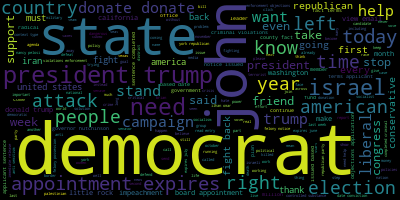

In [70]:
#Negative Sentiment - US - GOP
topic_model_pipeline(df_dom_gop,0,0,'Most Common Words within Highest Ranked Topic for Positive Sentiment')

## Let's try out some models

#### Model #1: Logistic Regression

In [30]:
df['comp_score'].value_counts()

1    68939
0    14376
Name: comp_score, dtype: int64

In [31]:
model_df = df[df['country']=='United States']
model_df.shape

(74148, 20)

In [32]:
model_df.head(1)

,sender,subject,date,body,party,country,locality,office,time,AM_PM,Hour,Hour_Mil,month,day,year,month_num,cleaned_body,sentiment,compound,comp_score
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019","Justice Democrats John Last month, we neede...",Democratic,United States,n/a,n/a,11:28 PM,PM,11,23,July,3,2019,7,justice democrats john last month needed ask h...,"{'neg': 0.047, 'neu': 0.487, 'pos': 0.467, 'co...",0.9912,1


In [33]:
from sklearn.model_selection import train_test_split

y = model_df['comp_score']
X = model_df['cleaned_body']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(51903,)
(51903,)
(22245,)
(22245,)


In [41]:
from sklearn.feature_extraction.text import CountVectorizer

#Count vectorizer for bag of words
cv=CountVectorizer(
    min_df=0,
    max_df=1,
    binary=False,
    ngram_range=(1,2)
)

#transformed train reviews
cv_train_text=cv.fit_transform(X_train)
#transformed test reviews
cv_test_text=cv.transform(X_test)

print('BOW_cv_train:',cv_train_text.shape)
print('BOW_cv_test:',cv_test_text.shape)

BOW_cv_train: (51903, 2668898)
BOW_cv_test: (22245, 2668898)


In [42]:
#training the model
from sklearn.linear_model import LogisticRegression

weights = {0:5.0, 1:1.0}

lr=LogisticRegression(
#     penalty='l2',
#     max_iter=500,
#     C=1,
    random_state=42,
    class_weight=weights
)

#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_text,y_train)
print(lr_bow)

LogisticRegression(class_weight={0: 5.0, 1: 1.0}, random_state=42)


In [43]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_text)

print('BOW Negative Predictions: ', lr_bow_predict.tolist().count(0))
print('BOW Positive Predictions: ', lr_bow_predict.tolist().count(1))

BOW Negative Predictions:  963
BOW Positive Predictions:  21282


In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Accuracy score for bag of words
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

lr_bow_score : 0.8565070802427511


In [45]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from numpy import mean

# #Define evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(lr, cv_train_text, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# # summarize performance
# print('Mean ROC AUC: %.3f' % mean(scores))

In [46]:
#Classification report for bag of words 
lr_bow_report=classification_report(y_test,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.82      0.21      0.33      3811
    Negative       0.86      0.99      0.92     18434

    accuracy                           0.86     22245
   macro avg       0.84      0.60      0.63     22245
weighted avg       0.85      0.86      0.82     22245



In [47]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_test,lr_bow_predict,labels=[1,0])
print(cm_bow)

[[18262   172]
 [ 3020   791]]


#### Model #2: Random Forest Classification

In [48]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
rfc = RandomForestClassifier(n_estimators = 5,class_weight='balanced',verbose=2) 

# Training the model on the training dataset
rfc_fit = rfc.fit(cv_train_text,y_train)
print(rfc_fit)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 5


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   47.9s remaining:    0.0s


building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
RandomForestClassifier(class_weight='balanced', n_estimators=5, verbose=2)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.9min finished


In [49]:
#Predicting the model for bag of words
rfc_predict=rfc.predict(cv_test_text)

print('BOW Negative Predictions: ', rfc_predict.tolist().count(0))
print('BOW Positive Predictions: ', rfc_predict.tolist().count(1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


BOW Negative Predictions:  1798
BOW Positive Predictions:  20447


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.7s finished


In [50]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Accuracy score for bag of words
rfc_score=accuracy_score(y_test,rfc_predict)
print("rfc_score :",rfc_score)

rfc_score : 0.8345246122724208


In [ ]:
# #Define evaluation procedure
# rfc_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(rfc, cv_train_text, y_train, scoring='roc_auc', cv=rfc_cv, n_jobs=-1)
# # summarize performance
# print('Mean ROC AUC: %.3f' % mean(scores))

In [51]:
#Classification report for bag of words 
rfc_report=classification_report(y_test,rfc_predict,target_names=['Positive','Negative'])
print(rfc_report)

              precision    recall  f1-score   support

    Positive       0.54      0.25      0.34      3811
    Negative       0.86      0.95      0.91     18434

    accuracy                           0.83     22245
   macro avg       0.70      0.60      0.62     22245
weighted avg       0.81      0.83      0.81     22245



In [52]:
#confusion matrix for bag of words
cm_rfc=confusion_matrix(y_test,rfc_predict,labels=[1,0])
print(cm_bow)

[[18262   172]
 [ 3020   791]]


#### Model #3: NN Classification

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Set up the NN
model = Sequential() 
#layers
model.add(Dense(50,input_dim=cv_train_text.shape[1], kernel_initializer="uniform", activation="relu")) 
#model.add(Dense(6, kernel_initializer="uniform", activation="relu")) 
model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid")) 
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Fit the model
history = model.fit(cv_train_text, y_train.values.reshape(-1,1), batch_size=128)

406/406 [==============================] - 260s 639ms/step - loss: 0.5144 - accuracy: 0.8269


In [74]:
loss, acc = model.evaluate(cv_test_text, y_test.values, verbose=2)
print('Test Accuracy: %f' % (acc*100))

696/696 - 3s - loss: 0.4265 - accuracy: 0.8339
Test Accuracy: 83.394021
